In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [3]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [4]:
result = pd.read_csv(r"Substitution/news_vary_m.csv")

In [5]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Blom_runtime,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored
0,adressa=8_ballot=10000bs=4,8,10000,4,sor-trondelag,0,0,0.0,0.0,0.003484,...,0.185606,1,1,1,0,28,1,29,0,1
1,adressa=8_ballot=10000bs=4,8,10000,4,oslo,0,0,0.0,0.0,0.003423,...,0.132543,1,1,1,0,28,1,29,0,1
2,adressa=8_ballot=10000bs=4,8,10000,4,akershus,0,0,0.0,0.0,0.003338,...,0.201400,1,1,1,0,28,1,29,0,1
3,adressa=8_ballot=10000bs=4,8,10000,4,hedmark,0,0,0.0,0.0,0.005399,...,0.129170,1,1,1,0,28,1,29,0,1
4,adressa=8_ballot=10000bs=4,8,10000,4,florida,0,0,0.0,0.0,0.003025,...,0.122826,1,1,1,0,28,1,29,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,adressa=8_ballot=5000bs=4,8,5000,4,salzburg,2567,2567,1176.0,1176.0,0.000436,...,36.915013,1,1,0,220,2399,3194,2400,2487,287
1156,adressa=8_ballot=5000bs=4,8,5000,4,new mexico,2722,2722,1326.0,1326.0,0.000521,...,44.140546,1,1,0,205,2695,3382,2696,2574,366
1157,adressa=8_ballot=5000bs=4,8,5000,4,seoul teugbyeol-si,2095,2095,1033.0,1033.0,0.002653,...,3.259440,1,1,0,168,287,575,288,404,25
1158,adressa=8_ballot=5000bs=4,8,5000,4,ciudad real,2722,2722,1326.0,1326.0,0.000559,...,45.767271,1,1,0,205,2695,3382,2696,2574,366


In [6]:
result['margin_difference'] = result['heuristicV1_margin'] - result['Blom_margin']

In [7]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,adressa=8_ballot=10000bs=4,8,10000,4,sor-trondelag,0,0,0.0,0.0,0.003484,...,1,1,1,0,28,1,29,0,1,0.0
1,adressa=8_ballot=10000bs=4,8,10000,4,oslo,0,0,0.0,0.0,0.003423,...,1,1,1,0,28,1,29,0,1,0.0
2,adressa=8_ballot=10000bs=4,8,10000,4,akershus,0,0,0.0,0.0,0.003338,...,1,1,1,0,28,1,29,0,1,0.0
3,adressa=8_ballot=10000bs=4,8,10000,4,hedmark,0,0,0.0,0.0,0.005399,...,1,1,1,0,28,1,29,0,1,0.0
4,adressa=8_ballot=10000bs=4,8,10000,4,florida,0,0,0.0,0.0,0.003025,...,1,1,1,0,28,1,29,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,adressa=8_ballot=5000bs=4,8,5000,4,salzburg,2567,2567,1176.0,1176.0,0.000436,...,1,1,0,220,2399,3194,2400,2487,287,1391.0
1156,adressa=8_ballot=5000bs=4,8,5000,4,new mexico,2722,2722,1326.0,1326.0,0.000521,...,1,1,0,205,2695,3382,2696,2574,366,1396.0
1157,adressa=8_ballot=5000bs=4,8,5000,4,seoul teugbyeol-si,2095,2095,1033.0,1033.0,0.002653,...,1,1,0,168,287,575,288,404,25,1062.0
1158,adressa=8_ballot=5000bs=4,8,5000,4,ciudad real,2722,2722,1326.0,1326.0,0.000559,...,1,1,0,205,2695,3382,2696,2574,366,1396.0


In [8]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'],
      dtype='object')

In [9]:
avg = result.groupby(['Number_of_voters'])['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [10]:
avg.to_csv('tempAvgmovie=10.csv')

In [11]:
avgDf = pd.read_csv('tempAvgmovie=10.csv')
avgDf

,Number_of_voters,Number_Of_Candidates,Number_of_voters.1,Max_Ballot_length,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,Our_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,1000,8.0,1000.0,4.0,189.834483,189.834483,93.006897,93.006897,0.000972,1.518565,...,1.00000,1.0,0.482759,40.610345,477.137931,562.679310,478.137931,433.537931,58.248276,96.827586
1,5000,8.0,5000.0,4.0,827.879310,827.879310,407.417241,407.417241,0.001367,1.673570,...,0.97931,1.0,0.482759,46.331034,402.737931,532.965517,403.737931,415.955172,44.117241,420.462069
2,10000,8.0,10000.0,4.0,862.396552,862.396552,500.000000,500.000000,0.001539,3.498069,...,1.00000,1.0,0.517241,96.748276,304.755172,641.775862,305.755172,356.482759,15.834483,362.396552
3,30000,8.0,30000.0,4.0,5308.755172,5308.755172,2654.579310,2654.579310,0.001555,0.341758,...,1.00000,1.0,0.517241,9.093103,113.889655,161.948276,114.889655,151.193103,1.000000,2654.175862


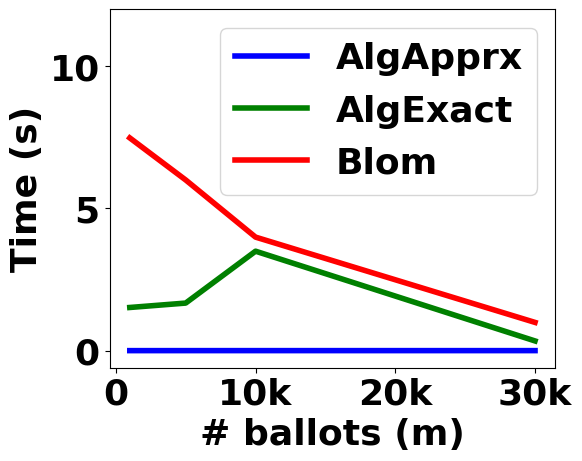

In [12]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_of_voters'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=oColor,linewidth=4)
plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('# ballots (m)')
plt.xticks([0,10000,20000,30000], ['0','10k','20k','30k'])
plt.ylim(-12*5/100,12)

plt.legend(["AlgApprx","AlgExact","Blom"],loc='upper right')
fig.savefig(r"Figures/substitution_news_n=8_vary_m_runtime.pdf",dpi=2024,bbox_inches='tight')